In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("ipl.csv")

In [ ]:
df.shape

(76014, 15)

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
# removing unnecessary columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print("Before removing the columns: {}".format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print("After removing the columns: {}".format(df.shape))

Before removing the columns: (76014, 15)
After removing the columns: (76014, 9)


In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [ ]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
# Keeping only consistent teams

print("Before removing unconsistent teams: {}".format(df.shape))
df = df[df["bat_team"].isin(consistent_teams) & df["bowl_team"].isin(consistent_teams)]
print("After removing unconsistent teams: {}".format(df.shape))

Before removing unconsistent teams: (76014, 9)
After removing unconsistent teams: (53811, 9)


In [ ]:
# print(df[df["bat_team"]=="Mumbai Indians"])
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [ ]:
# Removing first five over data

print("Before removing the data: {}".format(df.shape))
df = df[df["overs"] >= 5]
print("After removing the data: {}".format(df.shape))

Before removing the data: (53811, 9)
After removing the data: (40108, 9)


In [ ]:
# Chaning the date datatype to string
from datetime import datetime

print("Before changing the data type: {}".format(df.shape))
df["date"] = df["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d") )
print("After changing the data type: {}".format(df.shape))

Before changing the data type: (40108, 9)
After changing the data type: (40108, 9)


In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


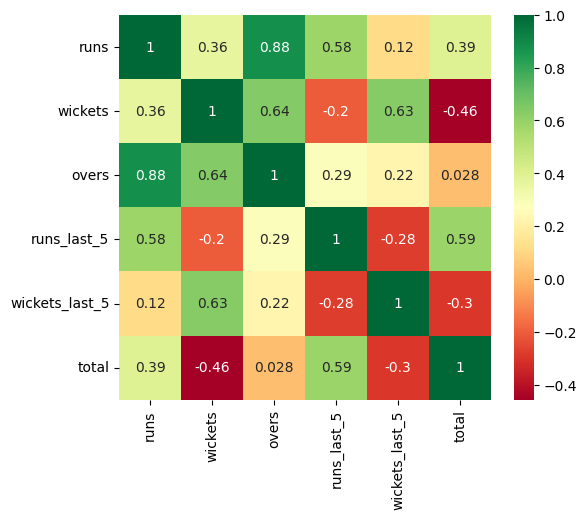

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

cor_matrix = numeric_df.corr()
top_corr_features = cor_matrix.index

plt.figure(figsize=(6,5))
g=sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')


In [ ]:
df.shape
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


**Data Processing**

In [ ]:
encoded_df = pd.get_dummies(data=df,columns=['bat_team',"bowl_team"])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
x_train = encoded_df.drop(labels="total",axis=1)[encoded_df['date'].dt.year <= 2016]
x_test = encoded_df.drop(labels="total", axis=1)[encoded_df['date'].dt.year > 2016]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year > 2016]["total"].values

x_train.drop(labels='date',axis=1,inplace=True)
x_test.drop(labels='date',axis=1,inplace=True)

print("Train set: {} and Test set: {}".format(x_train.shape,y_train.shape))

Train set: (37330, 21) and Test set: (37330,)


In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = linear_regressor.predict(x_test)

In [ ]:
# !pip install -U scikit-learn

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score

print("----Linear regression Model Evaluation----")
print("Mean abslute Error(MAE): {}".format(mae(y_test,y_pred_lr)))
print("Mean Squared Error(MSE): {}".format(mse(y_test,y_pred_lr)))
print("Root Mean Square Error(RMSE): {}".format(np.sqrt(mse(y_test,y_pred_lr))))

----Linear regression Model Evaluation----
Mean abslute Error(MAE): 12.118617546193239
Mean Squared Error(MSE): 251.00792310417287
Root Mean Square Error(RMSE): 15.843229566732058


In [ ]:
# !pip install -U scikit-learn

In [ ]:
# !pip install --upgrade pip

In [ ]:
# !pip install --force scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_predict_dt = decision_regressor.predict(x_test)

In [ ]:
print("----Decision Tree Regression Model Evaluation----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,y_predict_dt)))
print("Mean Square Error (MSE): {}".format(mse(y_test,y_predict_dt)))
print("Root Mean Square Error (RMSE): {}".format(np.sqrt(mse(y_test,y_predict_dt))))

----Decision Tree Regression Model Evaluation----
Mean Absolute Error (MAE): 16.904247660187185
Mean Square Error (MSE): 535.5385169186466
Root Mean Square Error (RMSE): 23.141705142850785


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_regressor = RandomForestRegressor()
random_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = random_regressor.predict(x_test)

In [ ]:
print("----Random Forest Regression Model Evaluation----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Square Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Square Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

----Random Forest Regression Model Evaluation----
Mean Absolute Error (MAE): 13.84844140183071
Mean Square Error (MSE): 335.3065935130383
Root Mean Square Error (RMSE): 18.311378798797165


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(x_train, y_train)

# from sklearn.ensemble import AdaBoostRegressor

# adb_regressor = AdaBoostRegressor(n_estimators=100)
# adb_regressor.fit(x_train, y_train)


AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [ ]:
y_pred_adb = adb_regressor.predict(x_test)

In [ ]:
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.166352313115372
Mean Squared Error (MSE): 247.86073968764376
Root Mean Squared Error (RMSE): 15.743593607802628


In [ ]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

In [ ]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 184 to 199


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
